<a href="https://colab.research.google.com/github/ErykEG/TC3006C_101_E5/blob/main/AnalisisV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Titanic - Machine Learning from Disaster</b></h1>

<h2><b>Equipo 5</b></h2>
Cleber Gerardo Pérez Galicia - A01236390 <br>
Juan Pablo Bernal Lafarga - A01742342 <br>
Jacobo Hirsch Rodríguez - A00829679 <br>
Eryk Elizondo González - A01284899 <br>





<h2><b>Descripción</b></h2>
El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado “insumergible”, se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1,502 de los 2,224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, se construye un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de los pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<h2><b>Objetivo</b></h2>
Utilizar el aprendizaje automático para crear un modelo que prediga qué pasajeros sobrevivieron al naufragio del Titanic.

<h2><b>Análisis Inicial</b></h2>

<h5><b>Montar Dataset dependiendo del usuario</b></h5>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Cleber Gerardo Pérez Galicia
%cd "/content/gdrive/MyDrive/TC3006_7C_101_E5/Titanic/Datasets"

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/TC3006_7C_101_E5/Titanic/Datasets'
/content


In [ ]:
# Juan Pablo Bernal Lafarga
%cd "/content/gdrive/MyDrive/TC300_Titanic"

/content/gdrive/MyDrive/TC300_Titanic


In [ ]:
# Jacobo Hirsch Rodríguez
%cd "/content/drive/MyDrive/.../TC3006_7C_101_E5/Titanic/Datasets"

[Errno 2] No such file or directory: '/content/drive/MyDrive/.../TC3006_7C_101_E5/Titanic/Datasets'
/content/gdrive/MyDrive/TC300_Titanic


In [ ]:
# Eryk Elizondo González
%cd "/content/gdrive/MyDrive/Tec/TecnologicoDeMonterrey/Semestres/Semestre7/TC3006_7C_101_E5/Titanic/Datasets"

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Tec/TecnologicoDeMonterrey/Semestres/Semestre7/TC3006_7C_101_E5/Titanic/Datasets'
/content/gdrive/MyDrive/TC300_Titanic


In [ ]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Abrir archivo
df = pd.DataFrame(pd.read_csv('train.csv'))

# Primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3><b>Análisis de Variables</b></h3>

In [ ]:
# Nombre de columnas
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
# Tipo de columnas
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Cantidad de datos
df.PassengerId.count()

891

In [ ]:
# Cantidad de datos por columna
df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
# Numero de datos faltantes por columna
df.PassengerId.count() - df.count()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Porcentaje de datos faltantes por columna
(df.PassengerId.count() - df.count())/df.PassengerId.count()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


<h4><b>PassengerId</b></h4>
PassengerId es una columna de identificador primario para las tuplas, no nos servirá para el análisis, más que para contar el número completo de pasajeros en la muestra.

<h4><b>Survived</b></h4>
Survived es la columna más importante para el análisis ya que nos indica si es que la persona falleció (0) o sobrevivió (1) lo cual es escencial para cumplir el objetivo. Es una columna de tipo entero con 2 valores binarios. No hay datos faltantes en la muestra.

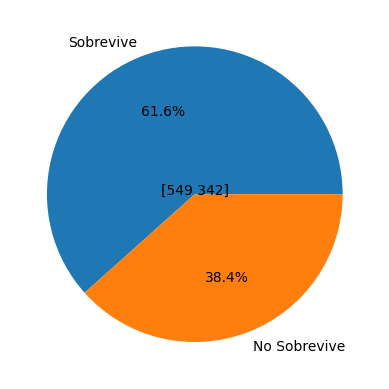

In [ ]:
# Sobrevive / No Sobrevive
survival_counts = df.groupby('Survived')['Survived'].count()
fig, ax = plt.subplots()
ax.pie(survival_counts.values, labels=['Sobrevive', 'No Sobrevive'], autopct='%1.1f%%')
plt.text(0,0,str(survival_counts.values),ha = 'center')
plt.show()

En la muestra, 61.6% o 549 de los pasajeros sobrevivieron, mientras que 38.4% o 342 no sobrevivieron.

<h4><b>Pclass</b></h4>
La variable "Pclass" es una variable categórica con 3 resultados.<br>

1.   Pasajero de clase alta<br>
2.   Pasajero de clase media<br>
3.   Pasajero de clase baja<br>

Es una variable con 891 datos registrados y es de tipo int64. El rango de valores va de 1 a 3.

<Axes: xlabel='Pclass', ylabel='Count'>

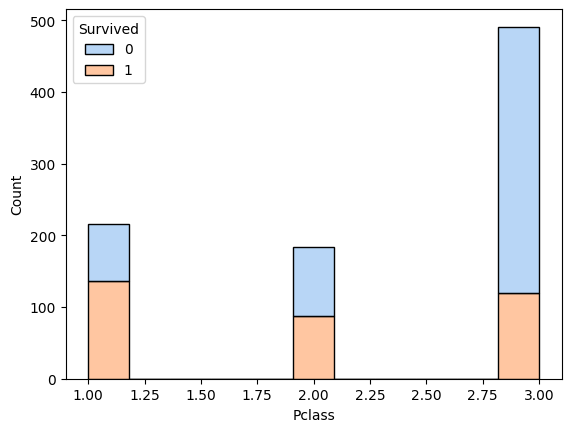

In [ ]:
sns.histplot(x = 'Pclass', hue = 'Survived', data = df, multiple='stack', palette='pastel')

In [ ]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

Hay 216 personas en la clase 1, 184 en la clase 2 y 491 en la clase 3.
Los supervivientes y muertos por clase son:

	Clase 1: 80 bajas y 136 supervivientes (El 62.96% de los pasajeros de la clase 1 sobrevivieron)
	Clase 2: 97 bajas y 87 supervivientes (El 47.48% de los pasajeros de la clase 2 sobrevivieron)
	Clase 3: 372 bajas y 119 supervivientes (El 24.36% de los pasajeros de la clase 3 sobrevivieron)

Con esta información podemos concluir que la probabilidad de supervivencia de acuerdo a tu clase aumenta conforme más alta sea. Las personas de clase 1 tienen casi el triple de probabilidades de sobrevivir que una pasajero de 3ra. clase.

<h4><b>Name</b></h4>
Name es una columna que indica el nombre del pasajero, como todos los nombres son distintos y los apellidos que se repiten son representados con sibsp o parch esta variable no nos servirá para el análisis.

<h4><b>Sex</b></h4>
(Jacobo)

vamos a analizar la variable sexo ya que se podría considerar que es de las variables mas importantes. Esta variable es una variable categorica nominal ya que no se considera que tenga alguna jerarquia implicita. Lo primero que necesitamos saber revisar si existen datos nulos del total de datos.

In [ ]:
nulos_sex = df['Sex'].isnull().sum()

# Muestra la cantidad de valores nulos
print(f'La columna "sex" tiene {nulos_sex} valores nulos.')

La columna "sex" tiene 0 valores nulos.


una vez que nos aseguramos que no tiene datos nulos o la cantidad es irrelevante, vamos a ver como se distribuye la informacion, es decir cuantos hombres y cuantas mujeres hay

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


podemos saber el porcentaje de supervivencia de entre hombres y mujeres, esto es posible por que groupby separa nuestro dataset en dos conjuntos de Sex, lo empata con la columna survived y obtiene el promedio al final, esto es posible gracias a que survived es una variable categorica (0 or 1), si todos sobreviven en una categoría la media es 1, si nadie sobrevive la media es 0, es un grupo sobrevivio es un valor entre 0 y 1.

In [ ]:
survived_by_sex = df.groupby('Sex')['Survived'].mean()
print(survived_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Ahora vamos a graficarlo

In [ ]:
# crea un dataframe donde lo filtras por la etiqueta survived == 1
survived = df[['Survived'] == 1]


# Cuenta la cantidad de hombres y mujeres que sobrevivieron
survived_count = survived['Sex'].value_counts()

# Crea una gráfica de barras
survived_count.plot(kind='bar', color=['pink', 'blue'])

# Agrega un título y etiquetas a los ejes
plt.title('Número de Hombres y Mujeres que Sobrevivieron')
plt.xlabel('Sexo')
plt.ylabel('Número de Supervivientes')

# Muestra la gráfica

KeyError: False

Podemos observar en la grafica y en analisis de la media que la mayoría de las mujeres sobrevivieron a comparación de los hombres, por lo que es sensato suponer que existe una correlación entre la variable sexo y supervivencia. Vamos a comprobarlo

In [ ]:
df['Sex_num'] = df['Sex'].map({'male': 0, 'female': 1})
correlation = df['Sex_num'].corr(df['Survived'])
print(f"Correlación entre Sex y Survived: {correlation}")

Correlación entre Sex y Survived: 0.5433513806577555


<h4><b>Age</b></h4>
Age es una variable que indica la edad en años del pasajero. Es una variable de tipo flotante donde, si se estima la edad, está en la forma xx.5. Aproximadamente 20% de los datos están faltantes. Como es una variable continua se manejarán rango de edades para nuestro eje horizontal.


In [ ]:
# Rango de la variable
df.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: xlabel='Age', ylabel='Count'>

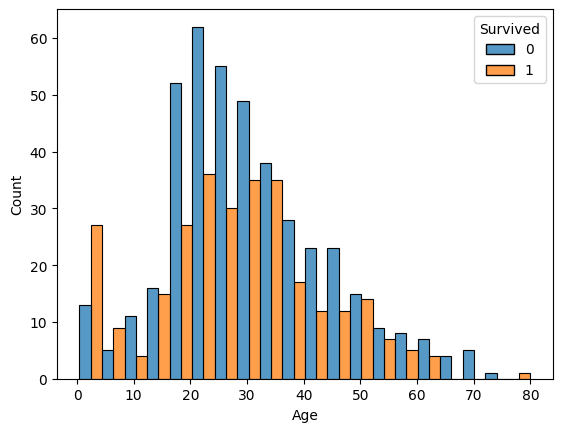

In [ ]:
# Definir rango de edad
age = df.dropna(subset=['Age'])
sns.histplot(age, x="Age", hue='Survived', multiple="dodge")

<Axes: xlabel='Age', ylabel='Density'>

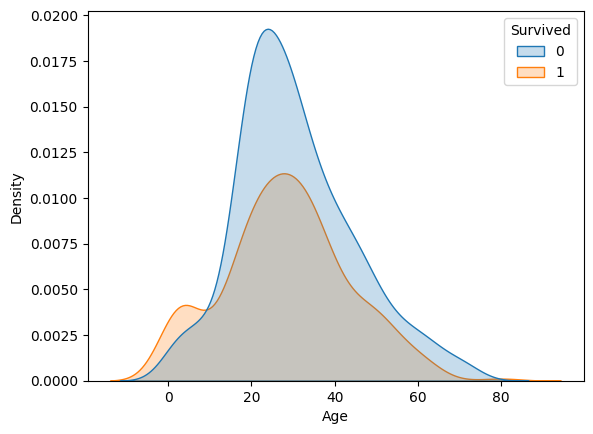

In [ ]:
sns.kdeplot(df, x= "Age", hue='Survived', fill=True, legend=True)

Mayor sobrevivencia abajo de 5?, mayor muerte en los 20s

<h4><b>SibSp</b></h4>
Esta variable nos indica la cantidad de relaciones familiares que tenia una persona, en esta variable agrupa a los hermanos / esposos. Dentro del analisis es importante saber si esta variable nos puede ser de utilidad ya que podemos ver si el hecho de tener mas familiares afecta a la supervivencia de las personas. Por ejemplo, si estas personas pudieron obtener ayuda de sus familiares a la hora de huir del barco o si priorizaron las supervivencia de sus seres queridos.

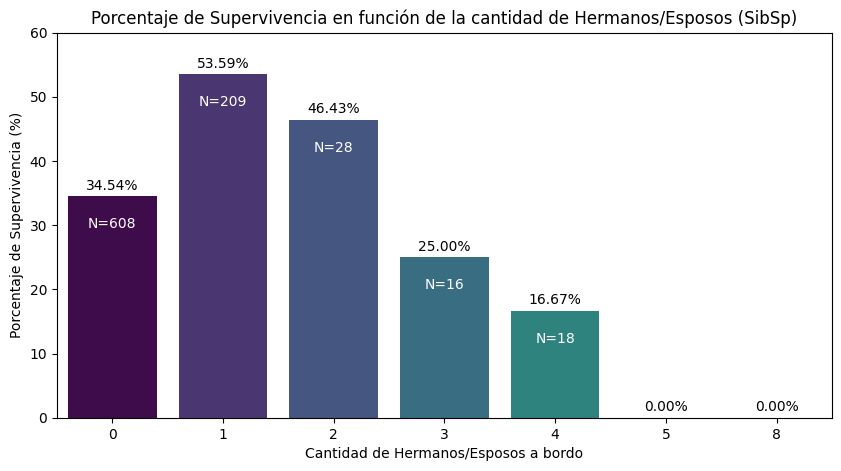

In [ ]:
# Porcentaje de supervivencia en función de SibSp
sibsp_survival = df.groupby('SibSp')['Survived'].mean() * 100
sibsp_counts = df['SibSp'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=sibsp_survival.index, y=sibsp_survival.values, palette="viridis", hue=sibsp_survival.index, dodge=False, legend=False)
plt.title('Porcentaje de Supervivencia en función de la cantidad de Hermanos/Esposos (SibSp)')
plt.xlabel('Cantidad de Hermanos/Esposos a bordo')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Mostrar el número de pasajeros y el porcentaje de supervivencia por cada categoría
for i, count in enumerate(sibsp_counts):
    plt.text(i, sibsp_survival.iloc[i] + 1, f'{sibsp_survival.iloc[i]:.2f}%', ha='center')
    plt.text(i, sibsp_survival.iloc[i] - 5, f'N={count}', color='white', ha='center')

plt.ylim(0, 60)
plt.show()

De la siguiente tabla podemos observar que si existe un aumento en el porcentaje de supervivencia en las personas que tengan almenos 1 o mas hermanos/esposos, aunque podemos observar un decremento si la cifra sube a mas de 2.

<h4><b>Parch</b></h4>
Esta variable es parecida a la anterior ya que mide tambien los familiares de las personas, pero esta es en base de si son hijos / padres.


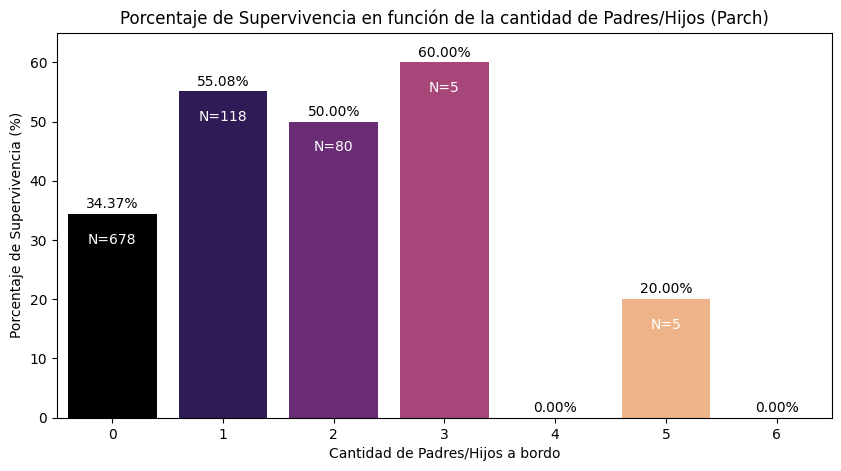

In [ ]:
# Porcentaje de supervivencia en función de Parch
parch_survival = df.groupby('Parch')['Survived'].mean() * 100
parch_counts = df['Parch'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=parch_survival.index, y=parch_survival.values, palette="magma", hue=parch_survival.index, dodge=False, legend=False)
plt.title('Porcentaje de Supervivencia en función de la cantidad de Padres/Hijos (Parch)')
plt.xlabel('Cantidad de Padres/Hijos a bordo')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Mostrar el número de pasajeros y el porcentaje de supervivencia por cada categoría
for i, count in enumerate(parch_counts):
    plt.text(i, parch_survival.iloc[i] + 1, f'{parch_survival.iloc[i]:.2f}%', ha='center')
    plt.text(i, parch_survival.iloc[i] - 5, f'N={count}', color='white', ha='center')

plt.ylim(0, 65)
plt.show()

Podemos observar que como en el anterior caso, el porcentaje de supervivientes se ve incrementada si se tiene almenos 1 o mas familiares hijos / padres, y si la cantidad llega a a ser mas numerosa de 4 en adelante la mortalidad es mas probable.

<h4><b>FamilySize</b></h4>
Esta es una nueva variable que creamos a partir de los datos anteriores de Sibsp y Parch, esto para obtener mejores datos para saber la cantidad de integrantes de familia que tiene cada persona dentro del titanic, para esto se calculo de siguiente manera: Sibsp + Parch + 1, este ultimo uno para incluir a la persona a su familia.

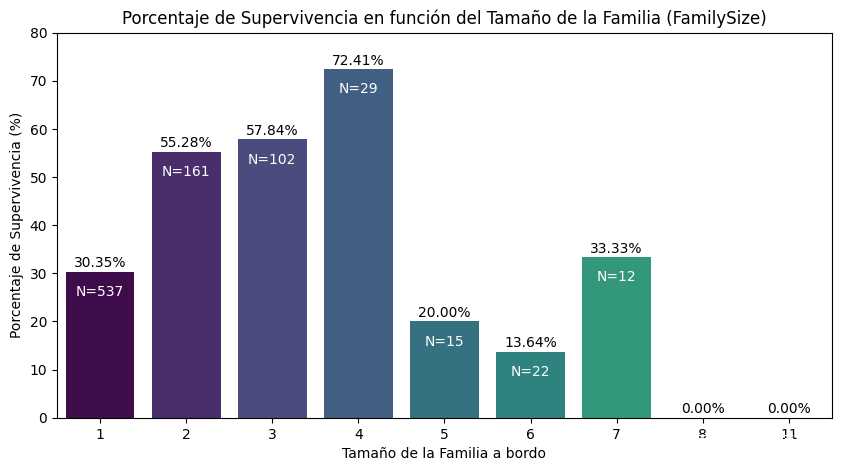

In [ ]:
# Crear la columna FamilySize (SibSp + Parch + 1 para incluir al propio pasajero)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Calcular el porcentaje de supervivencia para cada tamaño de familia
family_survival = df.groupby('FamilySize')['Survived'].mean() * 100

# Contar el número de pasajeros para cada tamaño de familia
family_counts = df['FamilySize'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=family_survival.index, y=family_survival.values, palette="viridis", hue=family_survival.index, dodge=False, legend=False)
plt.title('Porcentaje de Supervivencia en función del Tamaño de la Familia (FamilySize)')
plt.xlabel('Tamaño de la Familia a bordo')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Mostrar el número de pasajeros y el porcentaje de supervivencia por cada categoría en las barras
for i, count in enumerate(family_counts):
    plt.text(i, family_survival.iloc[i] + 1, f'{family_survival.iloc[i]:.2f}%', ha='center')
    plt.text(i, family_survival.iloc[i] - 5, f'N={count}', color='white', ha='center')

plt.ylim(0, 80)
plt.show()

<h4><b>Ticket</b></h4>
Ticket es una columna que nos indica el número de ticket del pasajero, como ya tenemos una cuenta de los pasajeros e información de su clase no nos sirve para el análisis.

<h4><b>Fare</b></h4>
Fare es una columna que nos indica el costo que pagó cada pasajero para subirse al Titanic, como los datos no están respaldados con equivalencias, como tal lugar o persona costaba más y como algunas tuplas están en $0.00 no nos va a servir para el análisis.

<h4><b>Cabin</b></h4>
Cabin es una columna que nos indica el número de cabina del pasajero. Aunque este dato nos puede ayudar a ubicar geográficamente a cada pasajero en el Titanic lo cual puede influir en la tasa de mortalidad, faltan el 77% de los datos para los pasajeros. Como existe una enorme falta de información para esta columna, no sería posible realizar un modelo con un error bajo debido a la falta de datos. Con base en lo anterior, esta variable no nos será de utilidad.

<h4><b>Embarked</b></h4>
Embarked es una columna que nos indica de qué puerto embarcó cada pasajero, sin embargo, los datos no indican ninguna correlación con la tasa de mortalidad, entonces no servirá esta variable.

## Predicción de supervivencia utilizando regresión lineal simple con la variable "Sex"

Primero, transformamos la columna "Sex" de strings a ints.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

A continuación, se llaman los paquetes y librerías necesarias, que en este caso se utiliza sklearn y statsmodels.
Además, inicializamos un modelo con la variable dependiente (Survived) y la variable independiente (Sex).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# División de los datos en train y test
# ==============================================================================
X = df['Sex']
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

Aquí se calcula el intercepto y coeficiente de la eucación de regresión y = m*x + b. Y además, se calcula la eficiencia del modelo, que es el coeficiente R^2.

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X.array.reshape(-1,1), y))

Intercept: [0.72265625]
Coeficiente: [(1, -0.5318667763157882)]
Coeficiente de determinación R^2: 0.29466126800890324


Ahora, tenemos el error medio cuadrático del modelo.

In [ ]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[0.72265625]
 [0.19078947]
 [0.19078947]]

El error (rmse) de test es: 0.38783309923200737


Cargamos la base de datos de prueba, la cual no tiene la columna "Survived"

In [ ]:
datatest = pd.read_csv('test.csv')
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Mediante el modelo entrenado y los datos de la base de datos "test", obtenemos las predicciones sobre los nuevos pasajeros.

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
label_encoder = LabelEncoder()
datatest['Sex'] = label_encoder.fit_transform(datatest['Sex'])
predicciones = np.round(modelo.predict(datatest['Sex'].array.reshape(-1,1)),0)

Aquí se crea el DataFrame con el PassengerId de los nuevos pasajeros y la predicción de si sobrevivieron o no.

In [ ]:
datanew = pd.DataFrame(index=range(418))
datanew['PassengerId'] = datatest['PassengerId']
datanew['Survived'] = predicciones
datanew.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


Dada la eficiencia del modelo y la naturaleza de la regresión lineal, podemos concluir que este modelo no es el necesario ni el adecuado para la clasificación correcta de la supervivencia de los pasajeros porque es un problema de clasificación binaria, no de predicción continua. Para estos casos, modelos de clasificación como la regresión logística son más adecuados y proporcionarán mejores resultados.

## Predicción con porcentajes de clases

In [ ]:
# Crear rangos de edad
# https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297#:~:text=Meanwhile%2C%20it%20is%20worth%20noting,)%20and%20old%20(60%20%2B).
# Bebé: 0-1 años
# Niño pequeño: 2-4 años
# Niño: 5-12 años
# Adolescente: 13-17 años
# Joven Adulto: 18-24 años
# Adulto: 25-34 años
# Mediana Edad: 35-54 años
# Mayor: 55-64 años
# Anciano: 65+ años

# Separar rangos de edad
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 1, 4, 12, 17, 24, 34, 54, 64, 100], labels=['Bebé', 'Niño pequeño', 'Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mediana Edad', 'Mayor', 'Anciano'])

# Calcular probabilidades de supervivencia por género, clase y grupo de edad comparando sobrevivientes/fallecidos/Total
probabilidades_sobrevivencia = (
    df.groupby(['Sex', 'Pclass', 'AgeGroup'])['Survived']
    .agg(lambda x: x.sum() / len(x) if len(x) > 0 else 0)
    .to_dict()
)

# Definimos umbral para decidir si predecimos supervivencia o no
umbral = 0.5

# Función para convertir edad a grupo
def convertir_edad_a_grupo(edad):
    if edad < 0:
        raise ValueError("La edad no puede ser negativa")
    elif edad <= 1:
        return 'Bebé'
    elif edad <= 4:
        return 'Niño pequeño'
    elif edad <= 12:
        return 'Niño'
    elif edad <= 17:
        return 'Adolescente'
    elif edad <= 24:
        return 'Joven Adulto'
    elif edad <= 34:
        return 'Adulto'
    elif edad <= 54:
        return 'Mediana Edad'
    elif edad <= 64:
        return 'Mayor'
    else:
        return 'Anciano'

# Función para predecir la supervivencia basada en género, clase y edad
def predecir_sobrevivencia(genero, clase, edad):
    grupo_edad = convertir_edad_a_grupo(edad)
    probabilidad = probabilidades_sobrevivencia.get((genero, clase, grupo_edad), 0)
    return 1 if probabilidad > umbral else 0

# Probamos modelo
dft = pd.DataFrame(pd.read_csv('test.csv'))
dft['Survived'] = dft.apply(lambda row: predecir_sobrevivencia(row['Sex'], row['Pclass'], row['Age']), axis=1)
dft[['PassengerId','Survived']]